## Final Project Submission

Please fill out:
* Student name: Steven Champion
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


You'll clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible.

In [1]:
#library imports and other setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

plt.style.use('ggplot')
sns.set_style('whitegrid')

In [2]:
df_kc_house = pd.read_csv('kc_house_data.csv')

In [3]:
print(df_kc_house.columns)
print('\n')
first_shape = df_kc_house.shape
print('Shape: ', first_shape)
print('\n')
print(df_kc_house.info())
print('\n')
df_kc_house.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


Shape:  (21597, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# print(df_kc_house.sort_values(by='date', ascending=False))

In [82]:
for column in df_kc_house:
    if df_kc_house[column].count() != first_shape[0]:
        print(column, df_kc_house[column].count())

waterfront 19221
view 21534
yr_renovated 17755


In [ ]:
df_kc_house.date.type()

investigate id further, because it seems like the duplicates are the same house on different dates, so for price prediction these data points probably don't actually count as duplicates

Cleaning:

Number of renovations  744


Text(0, 0.5, 'Count')

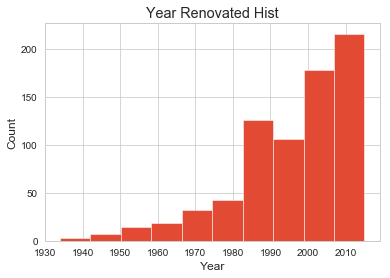

In [102]:
renovated = df_kc_house.loc[(df_kc_house.yr_renovated != 0)&df_kc_house.yr_renovated.notnull()]
print('Number of renovations ', renovated.shape[0])
# renovated.yr_renovated.value_counts()
renovated.yr_renovated.hist(bins = 10)
plt.title('Year Renovated Hist')
plt.xlabel('Year')
plt.ylabel('Count')

In [6]:
df_grouped = df_kc_house.groupby(['id','price']).sum()
df_grouped.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id      price                                                          
1000102 280000.0         6       3.00         2400      9373     2.0   
        300000.0         6       3.00         2400      9373     2.0   
1200019 647500.0         4       1.75         2060     26036     1.0   
1200021 400000.0         3       1.00         1460     43000     1.0   
2800031 235000.0         3       1.00         1430      7599     1.5   

                  waterfront  view  condition  grade  sqft_above  yr_built  \
id      price                                                                
1000102 280000.0         0.0   0.0          3      7        2400      1991   
        300000.0         0.0   0.0          3      7        2400      1991   
1200019 647500.0         0.0   0.0          4      8        1160      1947   
1200021 400000.0         0.0   0.0          3      7        1460      1952   
2800031 235000.0         0.0   0.0          4      6        1010      1930   

                  yr_renovated  zipcode      lat     long  sqft_living15  \
id      price                                                              
1000102 280000.0           0.0    98002  47.3262 -122.214           2060   
        300000.0           0.0    98002  47.3262 -122.214           2060   
1200019 647500.0           0.0    98166  47.4444 -122.351           2590   
1200021 400000.0           0.0    98166  47.4434 -122.347           2250   
2800031 235000.0           0.0    98168  47.4783 -122.265           1290   

                  sqft_lot15  
id      price                 
1000102 280000.0        7316  
        300000.0        7316  
1200019 647500.0       21891  
1200021 400000.0       20023  
2800031 235000.0       10320

The waterfront and yr_renovated columns appear to have some significant data missing. The view column also has some missing data, worth investigating. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001705F0C4DA0>,
      dtype=object)

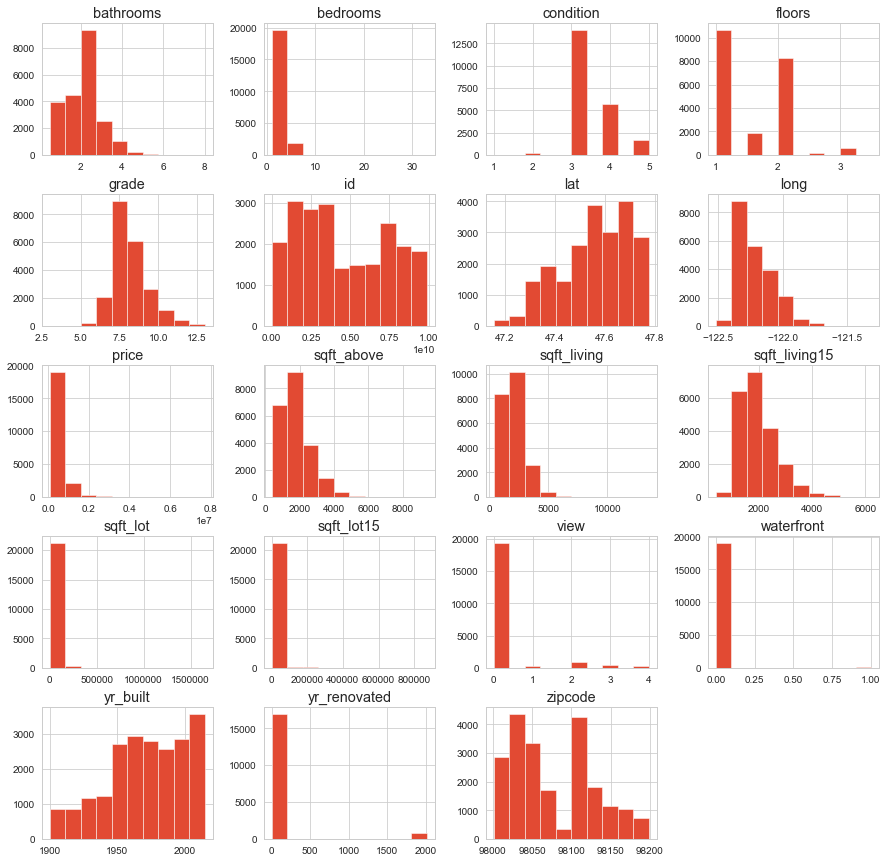

In [41]:
df_kc_house.hist(figsize=(15,15))